# Rainfall prediction 

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/ravit/Downloads/sydney_rain prediction.csv', header = 0)

In [4]:
#Dummy Variable 
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

In [5]:
for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)

df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2/1/2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  2/2/2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  2/3/2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  2/4/2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  2/5/2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.7     20.9              1                 1  
1     22.4     24.8              1                 1  
2     23.5     23.0              1                 1  
3     21.4     20.9              1                 1  
4     22.5     25.5              1                 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3334 non-null   float64
 3   MaxTemp           3335 non-null   float64
 4   Rainfall          3331 non-null   float64
 5   Evaporation       3286 non-null   float64
 6   Sunshine          3321 non-null   float64
 7   Humidity9am       3323 non-null   float64
 8   Humidity3pm       3324 non-null   float64
 9   Pressure9am       3317 non-null   float64
 10  Pressure3pm       3318 non-null   float64
 11  Cloud9am          2771 non-null   float64
 12  Cloud3pm          2776 non-null   float64
 13  Temp9am           3333 non-null   float64
 14  Temp3pm           3333 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


In [7]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace null values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill null values in "RainToday" with the mode
df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3337 non-null   float64
 3   MaxTemp           3337 non-null   float64
 4   Rainfall          3337 non-null   float64
 5   Evaporation       3337 non-null   float64
 6   Sunshine          3337 non-null   float64
 7   Humidity9am       3337 non-null   float64
 8   Humidity3pm       3337 non-null   float64
 9   Pressure9am       3337 non-null   float64
 10  Pressure3pm       3337 non-null   float64
 11  Cloud9am          3337 non-null   float64
 12  Cloud3pm          3337 non-null   float64
 13  Temp9am           3337 non-null   float64
 14  Temp3pm           3337 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


In [9]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2/1/2008   Sydney     19.5     22.4      15.6     6.200000       0.0   
1  2/2/2008   Sydney     19.5     25.6       6.0     3.400000       2.7   
2  2/3/2008   Sydney     21.6     24.5       6.6     2.400000       0.1   
3  2/4/2008   Sydney     20.2     22.8      18.8     2.200000       0.0   
4  2/5/2008   Sydney     19.7     25.7      77.4     5.187432       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.7     20.9              1                 1  
1     22.4     24.8              1                 1  
2     23.5     23.0              1                 1  
3     21.4     20.9              1                 1  
4     22.5     25.5              1                 1

In [10]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.551593     4.493290     9.886270     2.756095     3.801737   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.200000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.053668    16.261752     7.000492     7.012157     2.505491   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.800000  1011.300000     2.000000   
50%      69.000000    56.000000  1018.500000  1016.300000     4.181523   
75%      80.000000    64.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  RainToday_Yes  RainTomorrow_Yes  
count  3337.000000  3337.000000  3337.000000    3337.000000       3337.000000  
mean      4.218660    17.819742    21.533333       0.259515          0.259215  
std       2.409531     4.894240     4.301156       0.438434          0.438269  
min       0.000000     6.400000    10.200000       0.000000          0.000000  
25%       2.000000    13.800000    18.400000       0.000000          0.000000  
50%       4.218660    18.200000    21.300000       0.000000          0.000000  
75%       7.000000    21.700000    24.500000       1.000000          1.000000  
max       8.000000    36.500000    44.700000       1.000000          1.000000

# Outliers

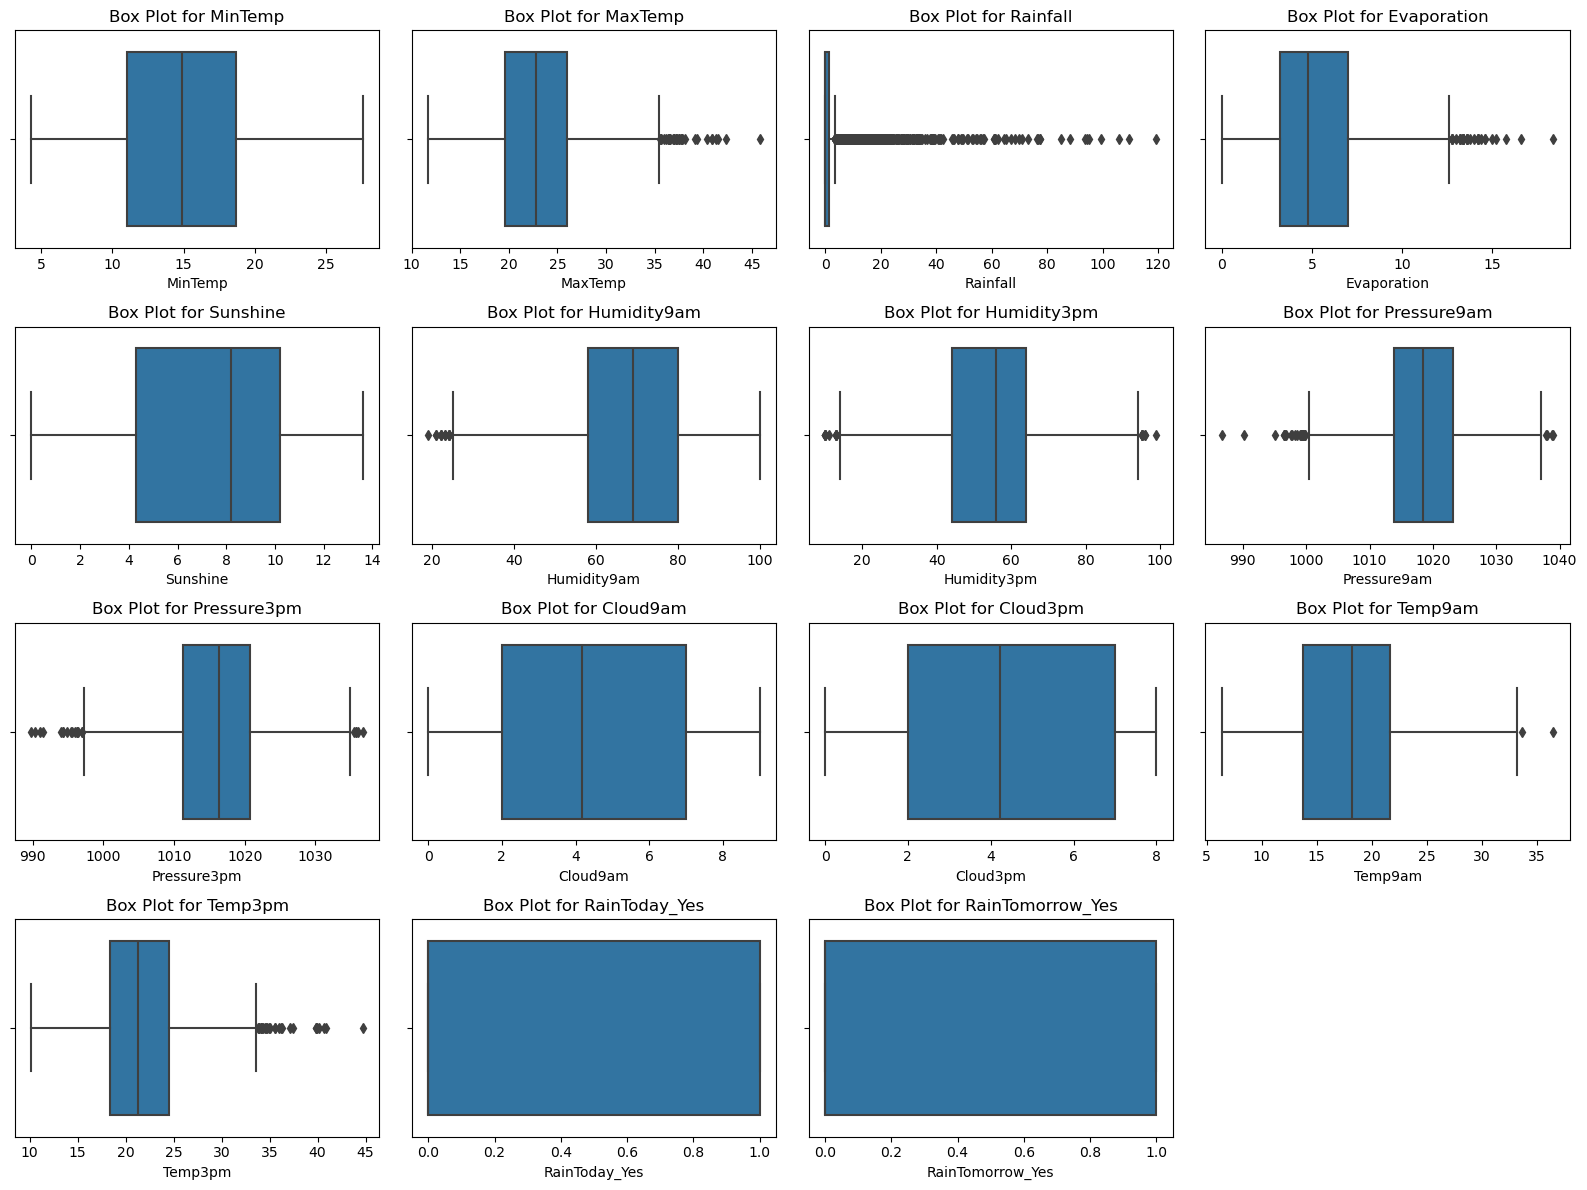

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

In [12]:
#outlier for Max_temp

upper_limit = np.percentile(df.MaxTemp, [99])[0]

In [13]:
df[(df.MaxTemp > 3*upper_limit)]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday_Yes, RainTomorrow_Yes]
Index: []

In [14]:
df.MaxTemp[(df.MaxTemp > 3*upper_limit)] = 3*upper_limit

C:\Users\ravit\AppData\Local\Temp\ipykernel_22200\505236707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxTemp[(df.MaxTemp > 3*upper_limit)] = 3*upper_limit


<Axes: >

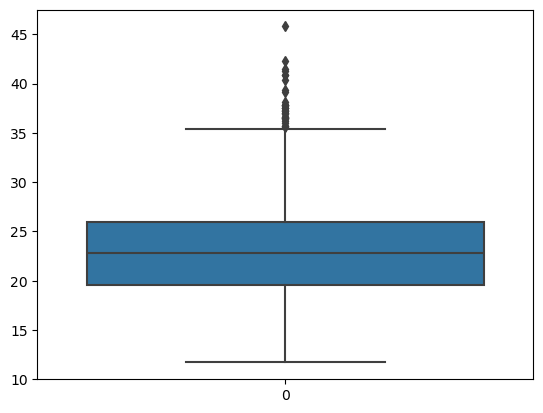

In [15]:
sns.boxplot(df['MaxTemp'])

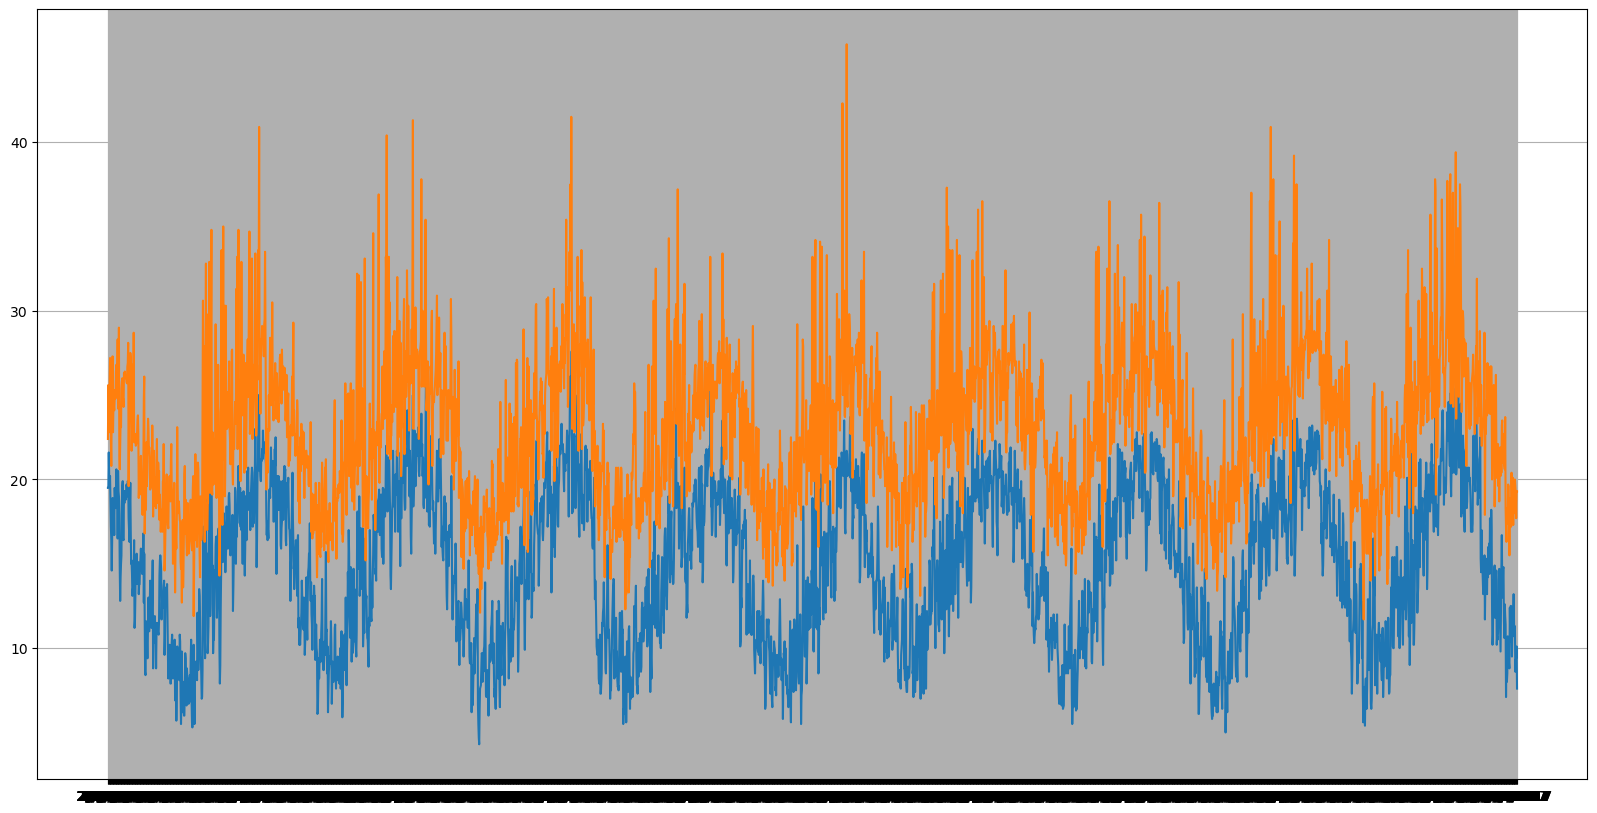

In [16]:
plt.figure(figsize = (20, 10))
fig = plt.plot(df['Date'], df[['MinTemp', 'MaxTemp']])
plt.grid();

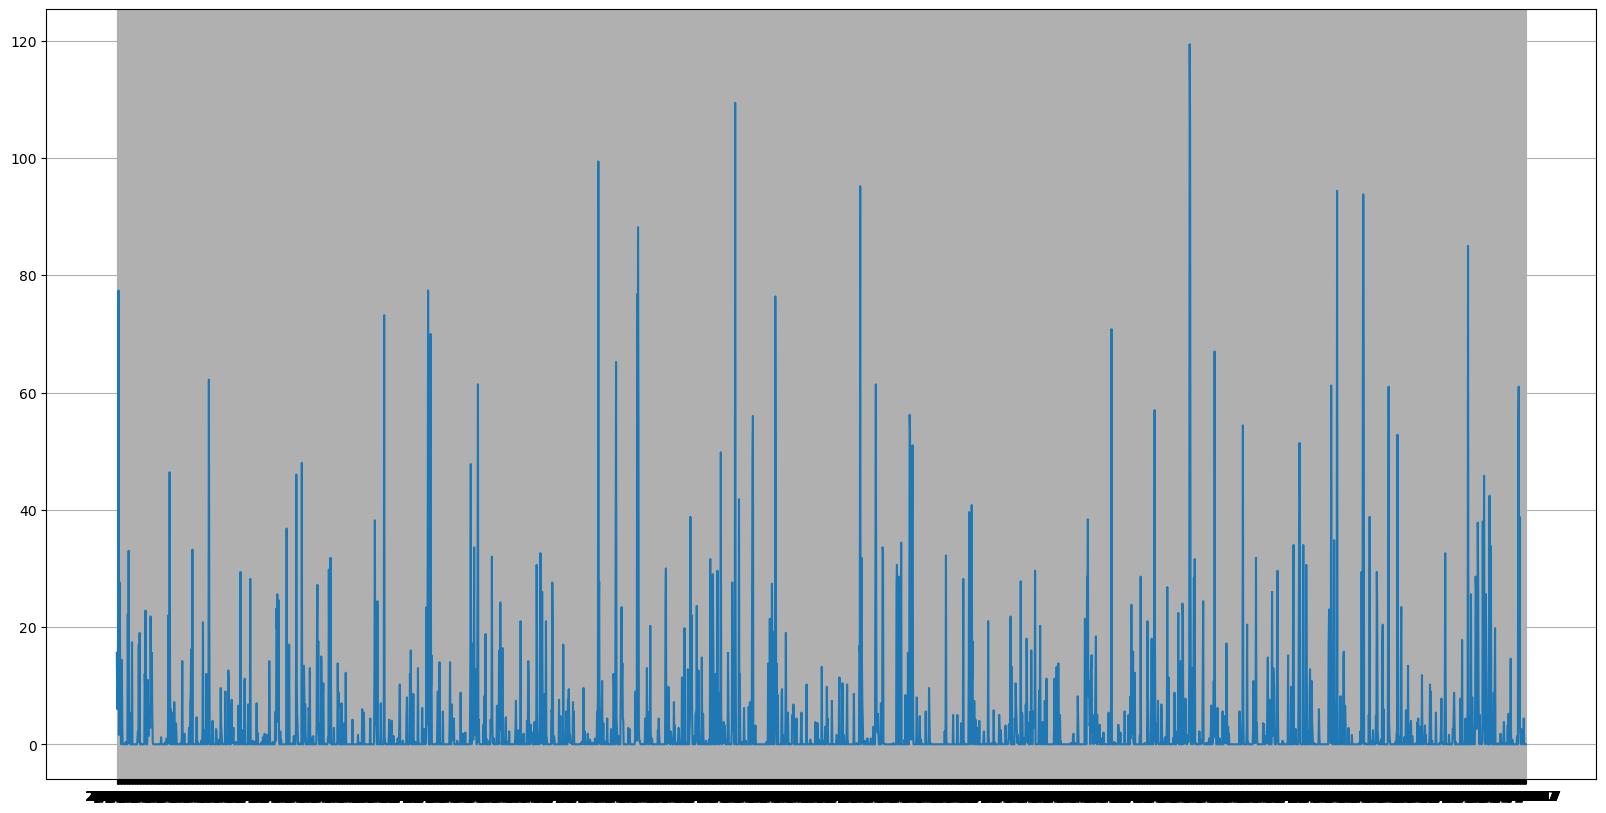

In [17]:
plt.figure(figsize = (20,10))
fig = plt.plot(df['Date'], df[['Rainfall']])
plt.grid();

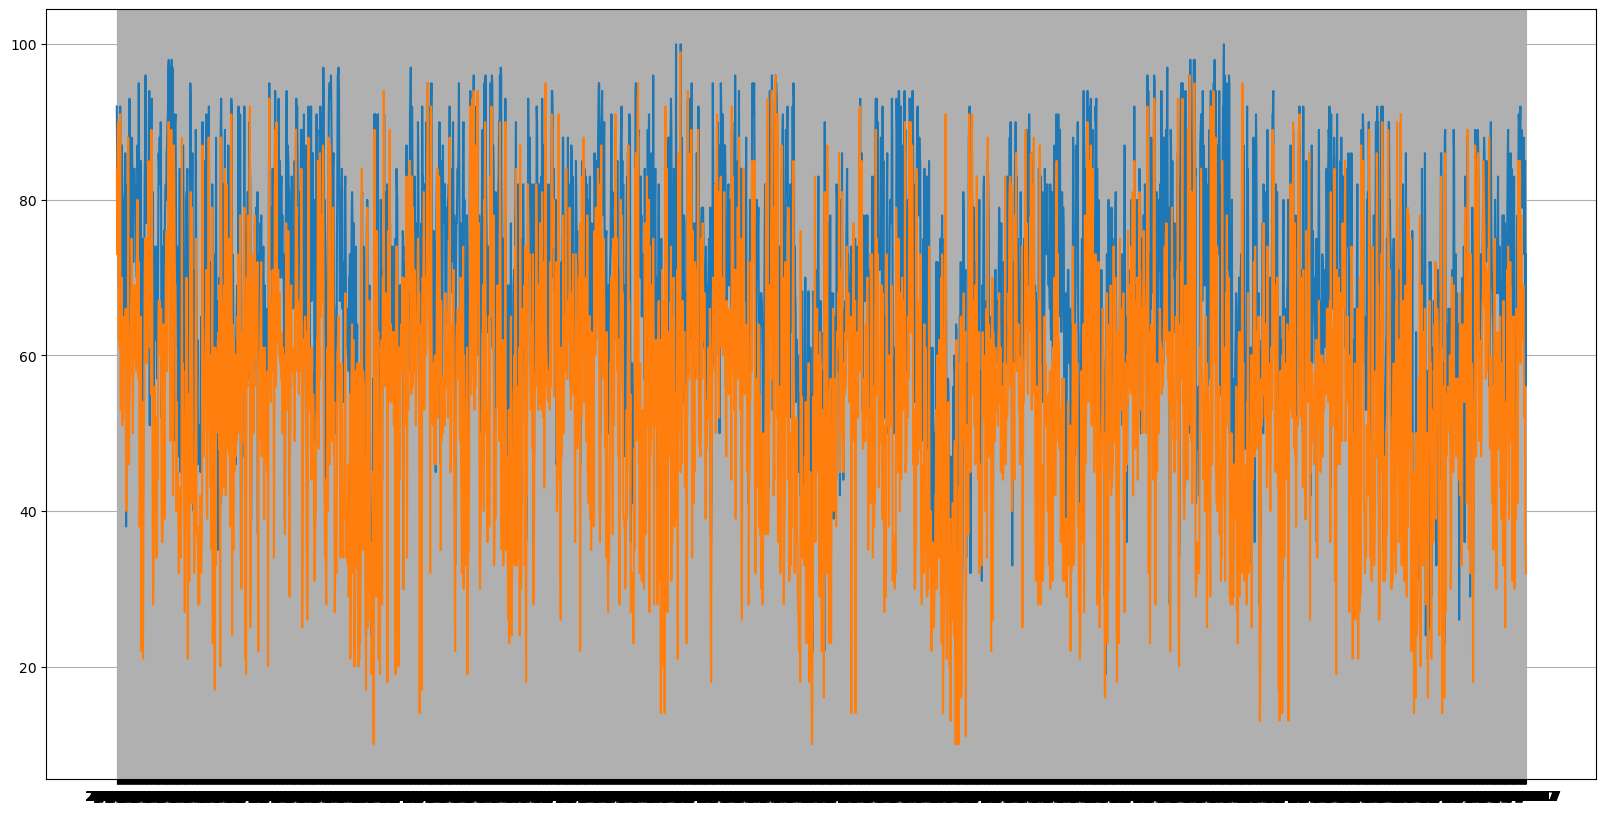

In [18]:
plt.figure(figsize = (20,10))
fig = plt.plot(df['Date'], df[['Humidity9am', 'Humidity3pm']])
plt.grid();

# Test-Train split

In [19]:
x_multi = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1)
y_multi = df['RainTomorrow_Yes']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=0)

# Classification tree training

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [21]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [22]:
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [24]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [25]:
#model performance
confusion_matrix(y_train,y_train_pred)

array([[1777,  185],
       [ 279,  428]], dtype=int64)

In [26]:
confusion_matrix(y_test,y_test_pred)

array([[457,  53],
       [ 73,  85]], dtype=int64)

In [27]:
accuracy_score(y_test,y_test_pred)

0.811377245508982

In [28]:
cfm_train_ct = confusion_matrix(y_train, y_train_pred)
cfm_test_ct = confusion_matrix(y_test, y_test_pred)
acs_train_ct = accuracy_score(y_train, y_train_pred)
acs_test_ct = accuracy_score(y_test, y_test_pred)
pcs_train_ct = precision_score(y_train, y_train_pred)
pcs_test_ct = precision_score(y_test, y_test_pred)
rcs_train_ct = recall_score(y_train, y_train_pred)
rcs_test_ct = recall_score(y_test, y_test_pred)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred)

# Barring

In [29]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [32]:
bag_clf.fit(x_train, y_train)

C:\Users\ravit\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [33]:
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[468,  42],
       [ 74,  84]], dtype=int64)

In [34]:
accuracy_score(y_test, bag_clf.predict(x_test))

0.8263473053892215

In [35]:
y_train_pred_bagging = bag_clf.predict(x_train)
y_test_pred_bagging = bag_clf.predict(x_test)

In [36]:
# Model Performance
cfm_train_bagging = confusion_matrix(y_train, y_train_pred_bagging)
cfm_test_bagging = confusion_matrix(y_test, y_test_pred_bagging)
acs_train_bagging = accuracy_score(y_train, y_train_pred_bagging)
acs_test_bagging = accuracy_score(y_test, y_test_pred_bagging)
pcs_train_bagging = precision_score(y_train, y_train_pred_bagging)
pcs_test_bagging = precision_score(y_test, y_test_pred_bagging)
rcs_train_bagging = recall_score(y_train, y_train_pred_bagging)
rcs_test_bagging = recall_score(y_test, y_test_pred_bagging)
roc_auc_score_train_bagging = roc_auc_score(y_train, y_train_pred_bagging)
roc_auc_score_test_bagging = roc_auc_score(y_test, y_test_pred_bagging)

# Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [39]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [40]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[481,  29],
       [ 77,  81]], dtype=int64)

In [41]:
accuracy_score(y_test, rf_clf.predict(x_test))

0.8413173652694611

In [42]:
y_train_pred_rf = rf_clf.predict(x_train)
y_test_pred_rf = rf_clf.predict(x_test)

In [43]:
# Model Performance
cfm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cfm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
acs_train_rf = accuracy_score(y_train, y_train_pred_rf)
acs_test_rf = accuracy_score(y_test, y_test_pred_rf)
pcs_train_rf = precision_score(y_train, y_train_pred_rf)
pcs_test_rf = precision_score(y_test, y_test_pred_rf)
rcs_train_rf = recall_score(y_train, y_train_pred_rf)
rcs_test_rf = recall_score(y_test, y_test_pred_rf)
roc_auc_score_train_rf = roc_auc_score(y_train, y_train_pred_rf)
roc_auc_score_test_rf = roc_auc_score(y_test, y_test_pred_rf)

# Grid search

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [46]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [3, 5, 9],
              }

In [47]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=3, scoring='accuracy')

In [48]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 5, 9]},
             scoring='accuracy')

In [49]:
grid_search.best_params_ 

{'max_features': 5, 'min_samples_split': 9}

In [50]:
cvrf_clf = grid_search.best_estimator_

In [51]:
accuracy_score(y_test, cvrf_clf.predict(x_test))

0.8323353293413174

In [52]:
confusion_matrix(y_test, cvrf_clf.predict(x_test))

array([[476,  34],
       [ 78,  80]], dtype=int64)

# Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [55]:
accuracy_score(y_test, gbc_clf.predict(x_test))

0.8413173652694611

In [56]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [57]:
accuracy_score(y_train, gbc_clf2.predict(x_train))

0.8471337579617835

In [58]:
accuracy_score(y_test, gbc_clf2.predict(x_test))

0.8383233532934131

In [59]:
y_train_pred_gb = gbc_clf2.predict(x_train)
y_test_pred_gb = gbc_clf2.predict(x_test)

In [60]:
# Model Performance
cfm_train_gb = confusion_matrix(y_train, y_train_pred_gb)
cfm_test_gb = confusion_matrix(y_test, y_test_pred_gb)
acs_train_gb = accuracy_score(y_train, y_train_pred_gb)
acs_test_gb = accuracy_score(y_test, y_test_pred_gb)
pcs_train_gb = precision_score(y_train, y_train_pred_gb)
pcs_test_gb = precision_score(y_test, y_test_pred_gb)
rcs_train_gb = recall_score(y_train, y_train_pred_gb)
rcs_test_gb = recall_score(y_test, y_test_pred_gb)
roc_auc_score_train_gb = roc_auc_score(y_train, y_train_pred_gb)
roc_auc_score_test_gb = roc_auc_score(y_test, y_test_pred_gb)

# Ada boosting method

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [63]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [64]:
accuracy_score(y_train, ada_clf.predict(x_train))

0.855751217684526

In [65]:
accuracy_score(y_test, ada_clf.predict(x_test))

0.8383233532934131

In [66]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [67]:
ada_clf2.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [68]:
accuracy_score(y_test, ada_clf2.predict(x_test))

0.842814371257485

In [69]:
y_train_pred_adaboost=ada_clf2.predict(x_train)
y_test_pred_adaboost=ada_clf2.predict(x_test)

In [70]:
# Model Performance
cfm_train_adaboost = confusion_matrix(y_train, y_train_pred_adaboost)
cfm_test_adaboost = confusion_matrix(y_test, y_test_pred_adaboost)
acs_train_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
acs_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
pcs_train_adaboost = precision_score(y_train, y_train_pred_adaboost)
pcs_test_adaboost = precision_score(y_test, y_test_pred_adaboost)
rcs_train_adaboost = recall_score(y_train, y_train_pred_adaboost)
rcs_test_adaboost = recall_score(y_test, y_test_pred_adaboost)
roc_auc_score_train_adaboost = roc_auc_score(y_train, y_train_pred_adaboost)
roc_auc_score_test_adaboost = roc_auc_score(y_test, y_test_pred_adaboost)


# XG Boost

In [71]:
import xgboost as xgb

In [72]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [73]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
accuracy_score(y_test, xgb_clf.predict(x_test))

0.8383233532934131

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

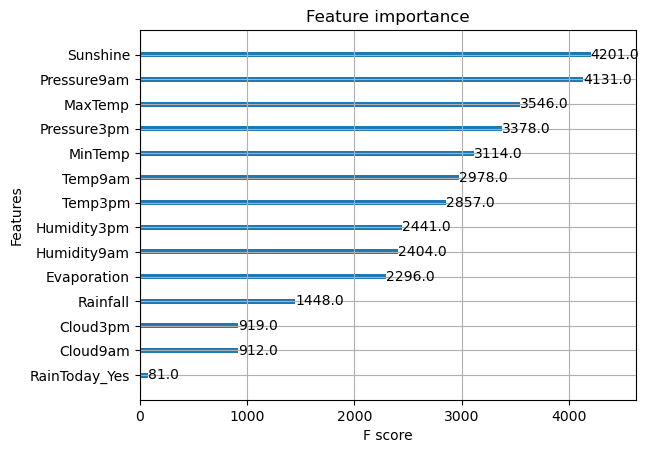

In [75]:
xgb.plot_importance(xgb_clf)

In [76]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [77]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [78]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [81]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [80]:
cvxg_clf = grid_search.best_estimator_

In [82]:
accuracy_score(y_test, cvxg_clf.predict(x_test))

0.842814371257485

In [83]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 3,
 'reg_alpha': 0.01,
 'subsample': 0.9}

In [84]:
# Model Performance
cfm_train_xgb = confusion_matrix(y_train, cvxg_clf.predict(x_train))
cfm_test_xgb = confusion_matrix(y_test, cvxg_clf.predict(x_test))
acs_train_xgb = accuracy_score(y_train, cvxg_clf.predict(x_train))
acs_test_xgb = accuracy_score(y_test, cvxg_clf.predict(x_test))
pcs_train_xgb = precision_score(y_train, cvxg_clf.predict(x_train))
pcs_test_xgb = precision_score(y_test, cvxg_clf.predict(x_test))
rcs_train_xgb = recall_score(y_train, cvxg_clf.predict(x_train))
rcs_test_xgb = recall_score(y_test, cvxg_clf.predict(x_test))
roc_auc_score_train_xgb = roc_auc_score(y_train, cvxg_clf.predict(x_train))
roc_auc_score_test_xgb = roc_auc_score(y_test, cvxg_clf.predict(x_test))

# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logreg_model = LogisticRegression(random_state=42)

In [87]:
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}


In [88]:
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=3, scoring='accuracy')
grid_search_logreg.fit(x_train, y_train)

C:\Users\ravit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ravit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [89]:
best_params_logreg = grid_search_logreg.best_params_
best_logreg_model = grid_search_logreg.best_estimator_

In [90]:
y_train_pred_lr= best_logreg_model.predict(x_train)
y_test_pred_lr = best_logreg_model.predict(x_test)

In [91]:
confusion_matrix(y_train, y_train_pred_lr)

array([[1835,  127],
       [ 326,  381]], dtype=int64)

In [92]:
confusion_matrix(y_test, y_test_pred_lr)

array([[479,  31],
       [ 80,  78]], dtype=int64)

In [93]:
accuracy_score(y_train, y_train_pred_lr)

0.8302735106781566

In [94]:
accuracy_score(y_test, y_test_pred_lr)

0.8338323353293413

In [95]:
# Model Performance
cfm_train_lr = confusion_matrix(y_train, y_train_pred_lr)
cfm_test_lr = confusion_matrix(y_test, y_test_pred_lr)
acs_train_lr = accuracy_score(y_train, y_train_pred_lr)
acs_test_lr = accuracy_score(y_test, y_test_pred_lr)
pcs_train_lr = precision_score(y_train, y_train_pred_lr)
pcs_test_lr = precision_score(y_test, y_test_pred_lr)
rcs_train_lr = recall_score(y_train, y_train_pred_lr)
rcs_test_lr = recall_score(y_test, y_test_pred_lr)
roc_auc_score_train_lr = roc_auc_score(y_train, y_train_pred_lr)
roc_auc_score_test_lr = roc_auc_score(y_test, y_test_pred_lr)


# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_classifier = KNeighborsClassifier()

In [98]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7]
}


In [99]:
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=3, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

In [100]:
best_params_knn = grid_search_knn.best_params_
best_knn_classifier = grid_search_knn.best_estimator_

In [101]:
y_train_pred_knn = best_knn_classifier.predict(x_train)
y_test_pred_knn = best_knn_classifier.predict(x_test)

In [102]:
confusion_matrix(y_train, y_train_pred_knn)

array([[1855,  107],
       [ 300,  407]], dtype=int64)

In [103]:
confusion_matrix(y_test, y_test_pred_knn)

array([[474,  36],
       [ 80,  78]], dtype=int64)

In [104]:
accuracy_score(y_train, y_train_pred_knn)

0.8475084301236419

In [105]:
accuracy_score(y_test, y_test_pred_knn)

0.8263473053892215

In [106]:
# Model Performance
cfm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
cfm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
acs_train_knn = accuracy_score(y_train, y_train_pred_knn)
acs_test_knn = accuracy_score(y_test, y_test_pred_knn)
pcs_train_knn = precision_score(y_train, y_train_pred_knn)
pcs_test_knn = precision_score(y_test, y_test_pred_knn)
rcs_train_knn = recall_score(y_train, y_train_pred_knn)
rcs_test_knn = recall_score(y_test, y_test_pred_knn)
roc_auc_score_train_knn = roc_auc_score(y_train, y_train_pred_knn)
roc_auc_score_test_knn = roc_auc_score(y_test, y_test_pred_knn)

# LDA

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [108]:
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

In [109]:
lda_model.fit(x_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [110]:
y_train_pred_lda = lda_model.predict(x_train)
y_test_pred_lda = lda_model.predict(x_test)

In [111]:
confusion_matrix(y_train, y_train_pred_lda)

array([[1799,  163],
       [ 284,  423]], dtype=int64)

In [112]:
confusion_matrix(y_test, y_test_pred_lda)

array([[468,  42],
       [ 68,  90]], dtype=int64)

In [113]:
accuracy_score(y_train, y_train_pred_lda)

0.8325215436493069

In [114]:
accuracy_score(y_test, y_test_pred_lda)

0.8353293413173652

In [115]:
precision_score(y_train, y_train_pred_lda)

0.7218430034129693

In [116]:
precision_score(y_test, y_test_pred_lda)

0.6818181818181818

In [117]:
#model performance
cfm_train_lda = confusion_matrix(y_train, y_train_pred_lda)
cfm_test_lda = confusion_matrix(y_test, y_test_pred_lda)
acs_train_lda = accuracy_score(y_train, y_train_pred_lda)
acs_test_lda = accuracy_score(y_test, y_test_pred_lda)
pcs_train_lda = precision_score(y_train, y_train_pred_lda)
pcs_test_lda = precision_score(y_test, y_test_pred_lda)
rcs_train_lda = recall_score(y_train, y_train_pred_lda)
rcs_test_lda = recall_score(y_test, y_test_pred_lda)
roc_auc_score_train_lda = roc_auc_score(y_train, y_train_pred_lda)
roc_auc_score_test_lda = roc_auc_score(y_test, y_test_pred_lda)

# Comparing all models

In [118]:
# Logistic Regression

print(f"Logistic Regression - Accuracy Score (Train): {acs_train_lr * 100:.4f}%")
print(f"Logistic Regression - Accuracy Score (Test): {acs_test_lr * 100:.4f}%")
print(f"Logistic Regression - ROC AUC Score (Test): {roc_auc_score_test_lr:.4f}")
print(f"Logistic Regression - Recall Score (Test): {rcs_test_lr:.4f}")
print(f"Logistic Regression - Precision Score (Test): {pcs_test_lr:.4f}")
print("="*60)  

# K-Nearest Neighbors
print(f"K-Nearest Neighbors - Accuracy Score (Train): {acs_train_knn * 100:.4f}%")
print(f"K-Nearest Neighbors - Accuracy Score (Test): {acs_test_knn * 100:.4f}%")
print(f"K-Nearest Neighbors - ROC AUC Score (Test): {roc_auc_score_test_knn:.4f}")
print(f"K-Nearest Neighbors - Recall Score (Test): {rcs_test_knn:.4f}")
print(f"K-Nearest Neighbors - Precision Score (Test): {pcs_test_knn:.4f}")
print("="*60)  

# Linear Discriminant Analysis
print(f"Linear Discriminant Analysis - Accuracy Score (Train): {acs_train_lda * 100:.4f}%")
print(f"Linear Discriminant Analysis - Accuracy Score (Test): {acs_test_lda * 100:.4f}%")
print(f"Linear Discriminant Analysis - ROC AUC Score (Test): {roc_auc_score_test_lda:.4f}")
print(f"Linear Discriminant Analysis - Recall Score (Test): {rcs_test_lda:.4f}")
print(f"Linear Discriminant Analysis - Precision Score (Test): {pcs_test_lda:.4f}")
print("="*60)

# Decision Tree
print(f"Decision Tree - Accuracy Score (Train): {acs_train_ct * 100:.4f}%")
print(f"Decision Tree - Accuracy Score (Test): {acs_test_ct * 100:.4f}%")
print(f"Decision Tree - ROC AUC Score (Test): {roc_auc_score_test:.4f}")
print(f"Decision Tree - Recall Score (Test): {rcs_test_ct:.4f}")
print(f"Decision Tree - Precision Score (Test): {pcs_test_ct:.4f}")
print("="*60)  # Double line

# Random Forest
print(f"Random Forest - Accuracy Score (Train): {acs_train_rf * 100:.4f}%")
print(f"Random Forest - Accuracy Score (Test): {acs_test_rf * 100:.4f}%")
print(f"Random Forest - ROC AUC Score (Test): {roc_auc_score_test_rf:.4f}")
print(f"Random Forest - Recall Score (Test): {rcs_test_rf:.4f}")
print(f"Random Forest - Precision Score (Test): {pcs_test_rf:.4f}")
print("="*60) 

# Gradient Boosting
print(f"Gradient Boosting - Accuracy Score (Train): {acs_train_gb * 100:.4f}%")
print(f"Gradient Boosting - Accuracy Score (Test): {acs_test_gb * 100:.4f}%")
print(f"Gradient Boosting - ROC AUC Score (Test): {roc_auc_score_test_gb:.4f}")
print(f"Gradient Boosting - Recall Score (Test): {rcs_test_gb:.4f}")
print(f"Gradient Boosting - Precision Score (Test): {pcs_test_gb:.4f}")
print("="*60)  

# AdaBoost
print(f"AdaBoost - Accuracy Score (Train): {acs_train_adaboost * 100:.4f}%")
print(f"AdaBoost - Accuracy Score (Test): {acs_test_adaboost * 100:.4f}%")
print(f"AdaBoost - ROC AUC Score (Test): {roc_auc_score_test_adaboost:.4f}")
print(f"AdaBoost - Recall Score (Test): {rcs_test_adaboost:.4f}")
print(f"AdaBoost - Precision Score (Test): {pcs_test_adaboost:.4f}")
print("="*60) 
# XGBoost
print(f"XGBoost - Accuracy Score (Train): {acs_train_xgb * 100:.4f}%")
print(f"XGBoost - Accuracy Score (Test): {acs_test_xgb * 100:.4f}%")
print(f"XGBoost - ROC AUC Score (Test): {roc_auc_score_test_xgb:.4f}")
print(f"XGBoost - Recall Score (Test): {rcs_test_xgb:.4f}")
print(f"XGBoost - Precision Score (Test): {pcs_test_xgb:.4f}")

Logistic Regression - Accuracy Score (Train): 83.0274%
Logistic Regression - Accuracy Score (Test): 83.3832%
Logistic Regression - ROC AUC Score (Test): 0.7164
Logistic Regression - Recall Score (Test): 0.4937
Logistic Regression - Precision Score (Test): 0.7156
K-Nearest Neighbors - Accuracy Score (Train): 84.7508%
K-Nearest Neighbors - Accuracy Score (Test): 82.6347%
K-Nearest Neighbors - ROC AUC Score (Test): 0.7115
K-Nearest Neighbors - Recall Score (Test): 0.4937
K-Nearest Neighbors - Precision Score (Test): 0.6842
Linear Discriminant Analysis - Accuracy Score (Train): 83.2522%
Linear Discriminant Analysis - Accuracy Score (Test): 83.5329%
Linear Discriminant Analysis - ROC AUC Score (Test): 0.7436
Linear Discriminant Analysis - Recall Score (Test): 0.5696
Linear Discriminant Analysis - Precision Score (Test): 0.6818
Decision Tree - Accuracy Score (Train): 82.6152%
Decision Tree - Accuracy Score (Test): 81.1377%
Decision Tree - ROC AUC Score (Test): 0.7170
Decision Tree - Recall S

# Q.1- Your views about the problem statement?

### Predicting rainfall using machine learning is aproblem statement that can have significant implications across various sectors,including agriculture, disaster management, urban planning, and water resource management. 

### Importance and Relevance
1. Agriculture: Accurate rainfall prediction can help farmers make informed decision about planting, irrigation and harvesting. It can lead to better crop yield management and reduce the risk of crop failure due to unexpected weather change.
2. Disaster Management: Timely predictions of heavy rainfall can help in disaster preparedness and response, reducing the impact of floods and landslides.Authorities can issue warnings and take preventive measures to protect lives and property.
3. Water Resource Management: Better rainfall forecasting can improve the management of reservoirs, dams, and water supply systems.It helps in optimizing the allocation of water resources during different seasons.

### Conclusion 
Predicting rainfalls has several benefits in daily humankind and making this model and showing accurate prediction will definetly make the company "The Daily Buzz" stand out in the market.

# Q.2- What will be your approach to solving this task?


# My approach to solving this task is as follows :
    
(A) Data Preprocessing

convert RainToday and RainTomorrow column into dummi variable
Replace Null values with mean of its
check for outliers in this dataset thier is no such outliers which affect the result

(B) Model Selcetion:

Trying various classification models, including Decision Trees and Ensemble methods (Random Forest, Gradient Boosting, AdaBoost, XGBoost).

(C) Model Training and Evaluation:

Split the data into test and train datasets.
Train the particular model on the training dataset.
evaluate their performance using metrics like accuracy, ROC AUC, recall, and precision.
Select the model with the best performance.

(D)Model Comparison:

Compare the performance of different models to select the best one

(E)Model Optimization:

use hyperparameter by gridsearchcv to improve model accuracy

# Q.3- What were the available ML model options you had to perform this task?
The available ML model options include:

Decision Trees

Random Forest

Gradient Boosting

AdaBoost

XGBoost

Logistic Regression

K-Nearest Neighbors

Linear Discriminant Analysis

# Q.4- Which model’s performance is best and what could be the possible reason for that?

# I evaluated several classification models and assessed their performance on the test dataset. Here are the results:

## Logistic Regression:

Accuracy Score (Train): 83.02748% 

Accuracy Score (Test): 83.3832%

ROC AUC Score (Test): 0.7164

Recall Score (Test): 0.4937

Precision Score (Test): 0.7156

## K-Nearest Neighbors:

Accuracy Score (Train): 84.7508%

Accuracy Score (Test): 82.6347%

ROC AUC Score (Test): 0.7115

Recall Score (Test): 0.4937

Precision Score (Test): 0.6842


## Linear Discriminant Analysis:

Accuracy Score (Train): 83.2522%

Accuracy Score (Test): 83.5329%

ROC AUC Score (Test): 0.7436

Recall Score (Test): 0.5696

Precision Score (Test): 0.6818


## Decision Tree:

Accuracy Score (Train): 82.6152%

Accuracy Score (Test): 81.1377%

ROC AUC Score (Test): 0.7170

Recall Score (Test): 0.5380

Precision Score (Test): 0.6159


## Random Forest:

Accuracy Score (Train): 100.0000%

Accuracy Score (Test): 84.1317%

ROC AUC Score (Test): 0.7279

Recall Score (Test): 0.5127

Precision Score (Test): 0.7364


## Gradient Boosting:

Accuracy Score (Train): 84.7134%

Accuracy Score (Test): 83.8323%

ROC AUC Score (Test): 0.7150

Recall Score (Test): 0.4810

Precision Score (Test): 0.7451


## AdaBoost:

Accuracy Score (Train): 100.0000%

Accuracy Score (Test): 84.2814%

ROC AUC Score (Test): 0.7289

Recall Score (Test): 0.5127

Precision Score (Test): 0.7431


## XGBoost:

Accuracy Score (Train): 90.2960%

Accuracy Score (Test): 84.2814%

ROC AUC Score (Test): 0.7267

Recall Score (Test): 0.5063

Precision Score (Test): 0.7477



## Analysis and Decision:


Ada boosting has the best performance with an accuracy score of 84.2814% on the test dataset. Ada boosting reduces overfitting and provides robust predictions through ensemble methods.


If precision is a priority, Xg boosting and Random forest may be considered, as both models have high precision scores. The choice of the best model depends on your specific goals and requirements.

# Q.5- What steps can you take to improve this selected model’s performance even further?

# To improve this selected model's performance further:
1. Increase Data: More data can improve model performance because it provides the model with more examples to learn from
2. Feature Engineering: Removing reduntant or irrelevant ones and retain with most relevant features.
3. Addressing Overfitting and Underfitting
4. Hyperparameters Tuning: Use technique like GridSearchCV and other method find the best parameters for your model.